### Running the previous step in the pipeline: Exploratory Data Analysis.

/home/not_real_fu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 80000
    })
    validation: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 10200
    })
})
                                                text            label  \
0  Your flight has been rescheduled for 10:00 AM ...          neutral   
1  We're happy to accommodate your dietary prefer...           polite   
2  Our vegetarian options are available on the me...          neutral   
3  I understand your frustration with the recent ...  somewhat polite   
4  I'll do my best to find a suitable replacement...  somewhat polite   

                                  source  \
0  meta-llama/Meta-Llama-3.1-8B-Instruct   
1  meta-llama/Meta-Llama-3.1-8B-Instruct   
2  meta-llama/Meta-Llama-3.1-8B-Instruct   
3  meta-llama/Meta-Llama-3.1

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/not_real_fu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['flight reschedul tomorrow pleas check airport websit updat chang', 'happi accommod dietari prefer vegetarian option care craft ensur delici satisfi meal would like recommend dish fit need', 'vegetarian option avail menu chef modifi dish suit dietari need', 'understand frustrat recent tournament result review stand see improv experi', 'best find suitabl replac item look need know look']
                                                text            label  \
0  Your flight has been rescheduled for 10:00 AM ...          neutral   
1  We're happy to accommodate your dietary prefer...           polite   
2  Our vegetarian options are available on the me...          neutral   
3  I understand your frustration with the recent ...  somewhat polite   
4  I'll do my best to find a suitable replacement...  somewhat polite   

                                  source  \
0  meta-llama/Meta-Llama-3.1-8B-Instruct   
1  meta-llama/Meta-Llama-3.1-8B-Instruct   
2  meta-llama/Meta-Llama-3.1-8B-Instru

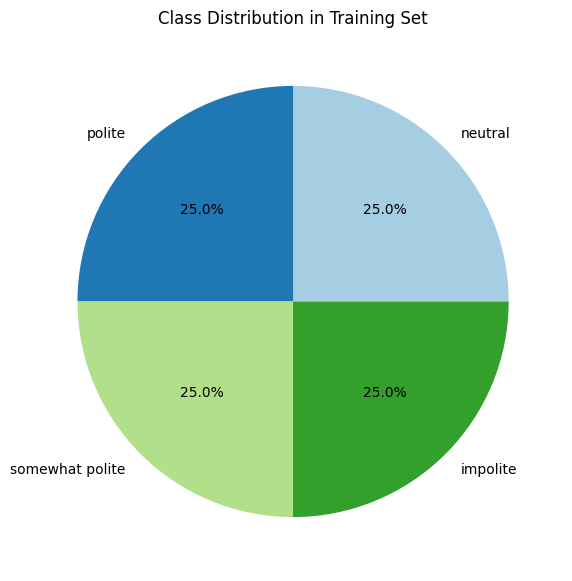

First Quartile (Q1) for unclean text: 23.0
Third Quartile (Q3) for unclean text: 38.0
First Quartile (Q1) for clean text: 10.0
Third Quartile (Q3) for clean text: 18.0


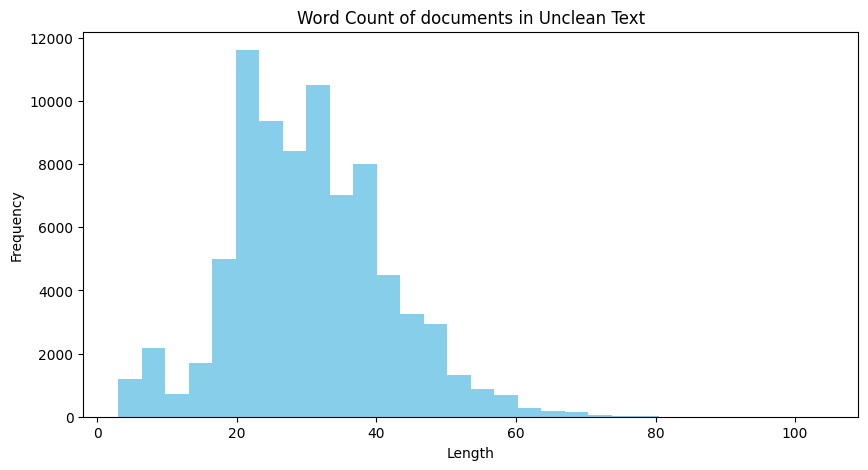

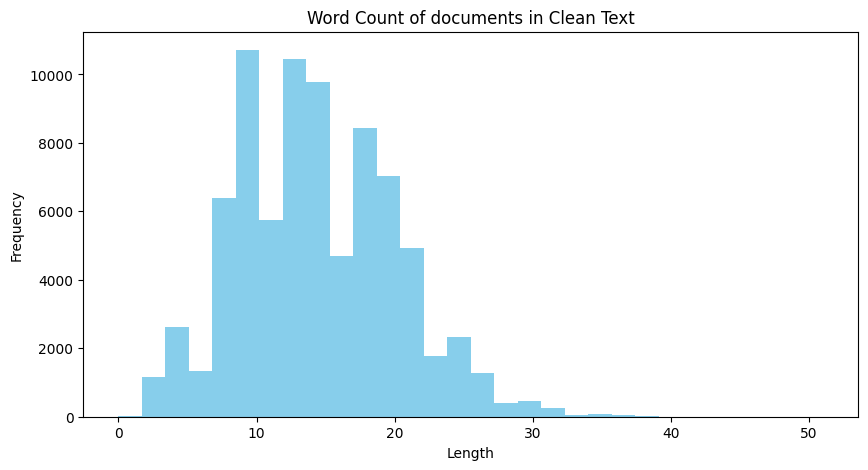

First Quartile (Q1) for unclean text: 129.0
Third Quartile (Q3) for unclean text: 217.0
First Quartile (Q1) for clean text: 63.0
Third Quartile (Q3) for clean text: 116.0


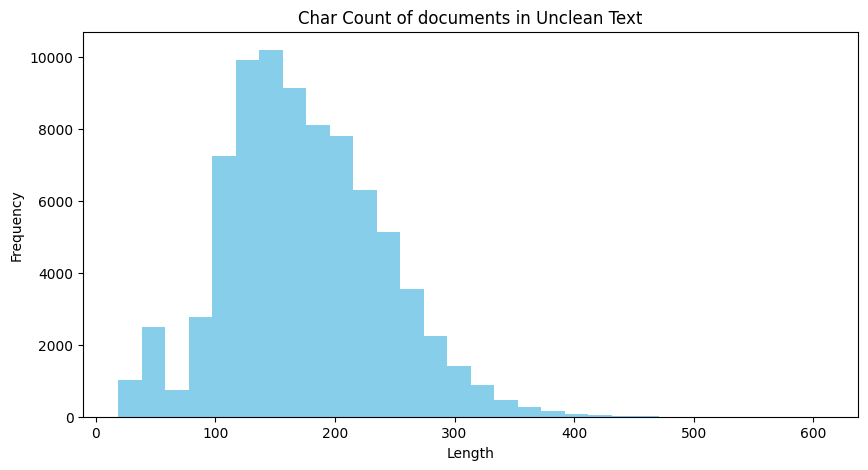

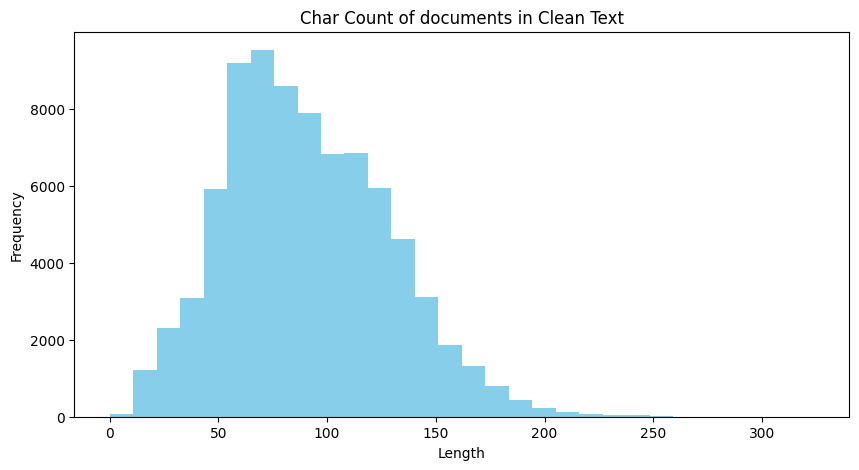

Unclean text average sentence length:
84.82997663690476
Clean text average sentence length:


/home/not_real_fu/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/not_real_fu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


90.54438180477256
Unclean text average word length:
4.7908009727635275
Clean text average word length:
5.370793926543044


/tmp/ipykernel_10823/2854834134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")


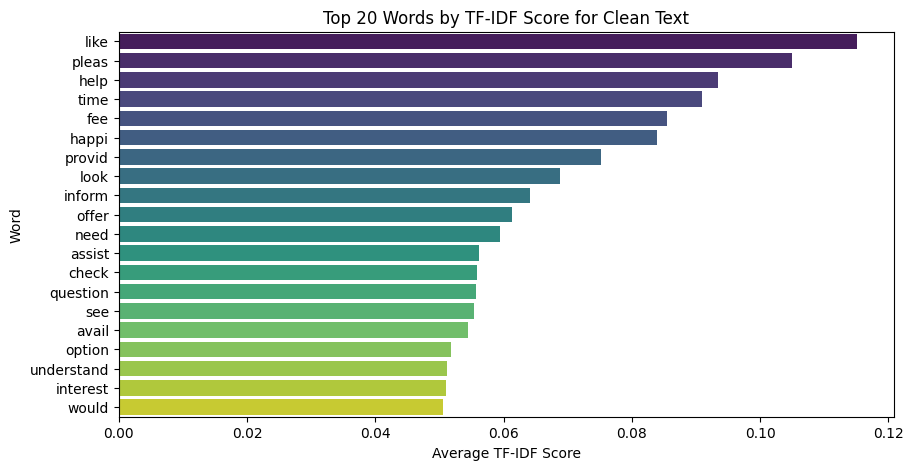

/tmp/ipykernel_10823/2854834134.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")


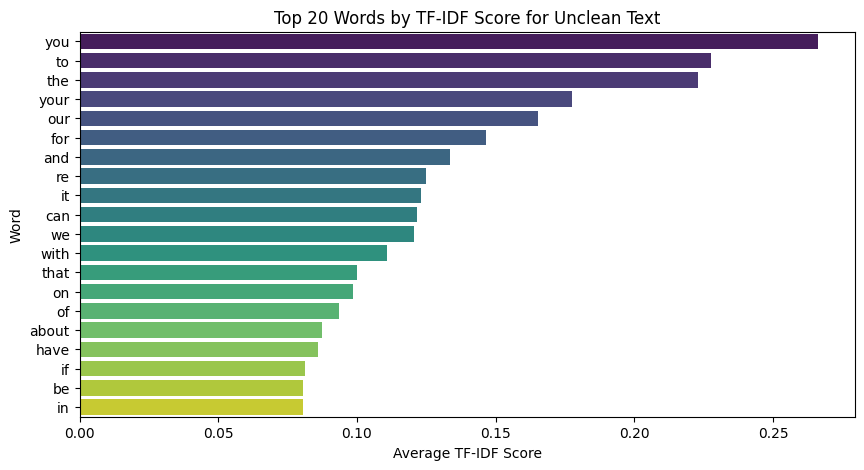

In [1]:
%run ./3.exploratory_data_analysis.ipynb

## **Representing the corpus in different models**
##### Now that we have cleaned documents from our dataset, it's time to represent them in different textual representations so we can use them to train our model.
#### **You might want to comment the blocks of code of the Space Representation Models section due to its sparity and they might be too inefficient due to the large dataset size.**
#### **Some computers might not meet the hardware requirements to store these sparce vectors. So comment if you think your computer can't handle it for the feature space of < 9000 columns and dataset of 80k rows**

## **Sparce representation models**
#### We are working mainly with 3 sparse representational models:
- #### **Bag of Words**;
- #### **1-Hot vector**;
- #### **Tf-Idf vector**;

### First representation model is **Bag of Words**

In [2]:

from sklearn.feature_extraction.text import CountVectorizer;
import numpy as np;

# print all the array content
np.set_printoptions(threshold=np.inf)

cv = CountVectorizer();

BoW = cv.fit_transform(clean_corpus).toarray();
print("Cleaned text", BoW.shape);


#print(cv.get_feature_names_out());

#print(BoW[0]);

Cleaned text (80000, 4981)


##### We compared the representation of the unclean and clean version of the corpus as well
##### As we can see, the cleaned text reduced the feature size (column number, y of the pair "(x,y)" of shape) by a significant amount because we reduced the words to their stem, standardized the capitalization and removed unecessary tokens like punctuation.
##### This increases the model performance by eliminating unecessary repetitions.


In [3]:

cv_unclean = CountVectorizer();
Bow_unclean = cv_unclean.fit_transform(unclean_corpus).toarray();
print("Unclean text",Bow_unclean.shape);
print("Cleaned text", BoW.shape);



Unclean text (80000, 8532)
Cleaned text (80000, 4981)


#### We can also plot a **wordcloud** using the representation (although it only uses the text corpus to count and not the vectorizer) respectively for:
- #### Unclean text;
- #### Clean text;

Word Cloud for unclean corpus


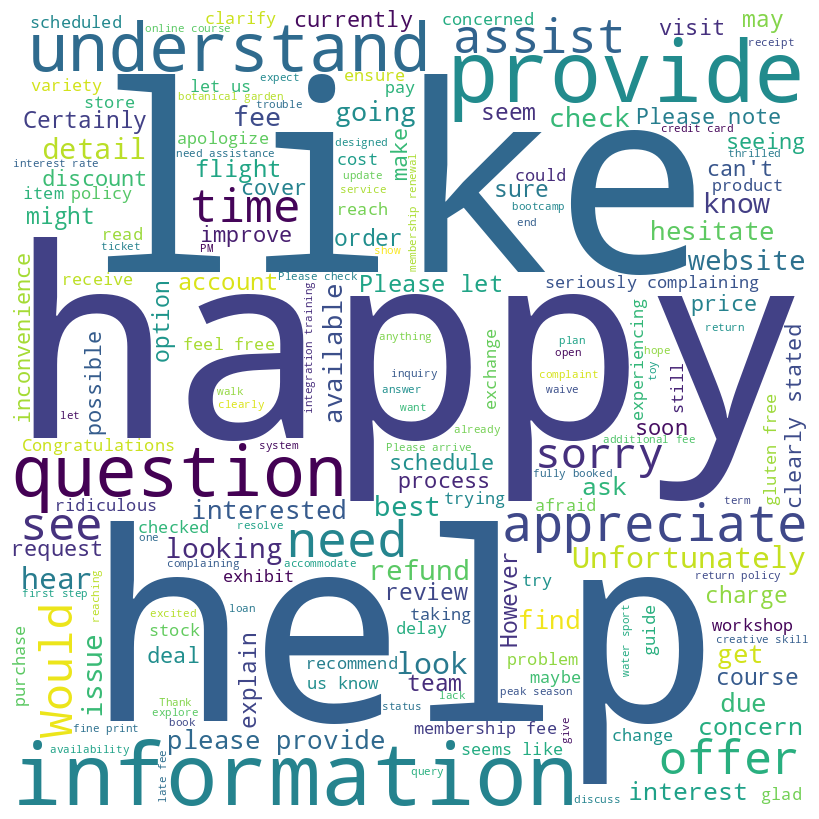

Word Cloud for clean corpus


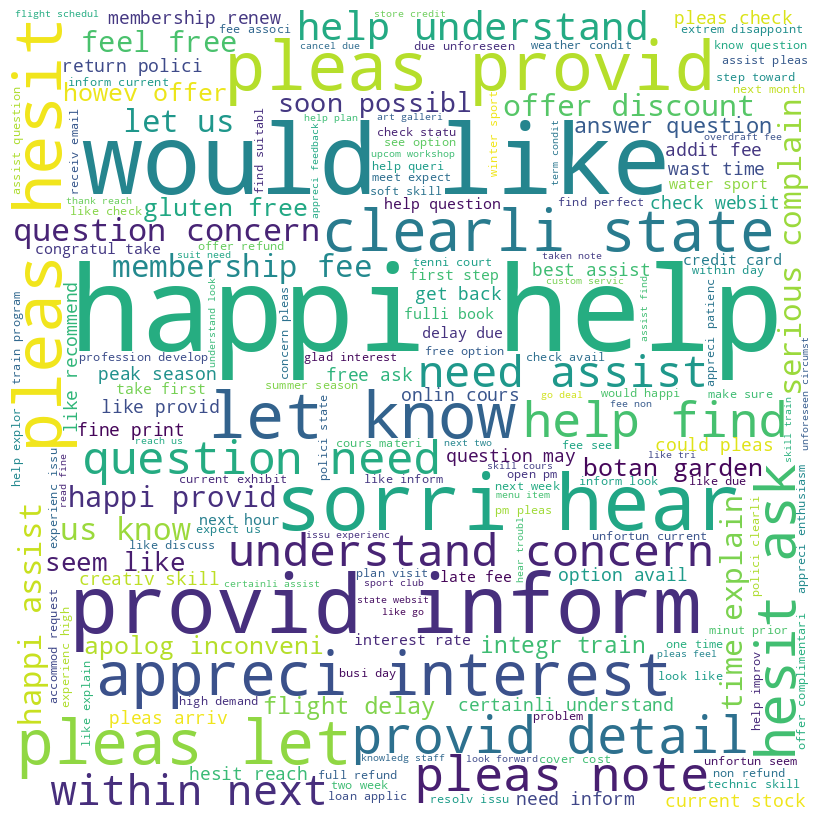

In [4]:
import wordcloud;
import matplotlib.pyplot as plt;


wordcloud_unclean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', stopwords = sw, min_font_size = 10).generate(" ".join(unclean_corpus));
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_unclean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for unclean corpus");
plt.show();

wordcloud_clean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', stopwords = sw, min_font_size = 10).generate(" ".join(clean_corpus));
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_clean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for clean corpus");
plt.show();



#### One noticeable difference is that some of the most common words like "help", "question" or "appreciate" were diminished, mainly because other words that were scattered in different forms in the unclean text were reduced to a common stem and a common standard so those words stand out more like "provid" "hear" and so on, because their counts increased. 

### Second representation model is **1-Hot vector**
##### This representation is basically Bag of Words but without counts, only a binary number indicating if the word exists or not accross the documents.

In [5]:

binary_vectorizer = CountVectorizer(binary=True);
one_hot_clean = binary_vectorizer.fit_transform(clean_corpus);
print(one_hot_clean.shape);

#print(one_hot_clean[0]);
binary_vectorizer_unclean = CountVectorizer(binary=True);
one_hot_unclean = binary_vectorizer.fit_transform(unclean_corpus);
print(one_hot_unclean.shape);


(80000, 4981)
(80000, 8532)


### Third representation is **TF-IDF**
##### This is a measure that takes into account the discriminative power of the words (repetitions of a word accross documents/text or power of a word to distinguish the document content) from the vocabulary considering all the documents(our texts), by assigning a weight to each of the terms of the vocabulary.
##### **TF** stands for Term Frequency and is the total frequency that a word appears considering all the documents;
##### **DF** stands for Document Frequency and it measures the number of documents that have a certain word. The higher the more frequent is a word accross all the documents (bad thing -> low discriminative power);
##### **IDF** stands for Inverse Document Frequency and the inverse of the DF. Higher means rarer the word is accross all the documents (good thing -> high discriminative power).
##### **TF-IDF** is a measure that is the product of **TF** and **IDF**:
- ##### Highest when t occurs many times within a small number of documents (A);
- ##### Lower when the term occurs fewer times in a document, or occurs in many documents (B);
- ##### Lowest when the term occurs in virtually all documents (C).

In [6]:
"""from sklearn.feature_extraction.text import TfidfVectorizer;

TfIdf_vectorizer_unclean = TfidfVectorizer();
Tf_idf_unclean = TfIdf_vectorizer_unclean.fit_transform(unclean_corpus).toarray();
features_unclean = TfIdf_vectorizer_unclean.get_feature_names_out();
print("TfIdf unclean",Tf_idf_unclean.shape)

TfIdf_vectorizer = TfidfVectorizer();
Tf_Idf = TfIdf_vectorizer.fit_transform(clean_corpus).toarray();
features_clean = TfIdf_vectorizer.get_feature_names_out();
print("TfIdf clean", Tf_Idf.shape);"""
#print(Tf_Idf[0]);


'from sklearn.feature_extraction.text import TfidfVectorizer;\n\nTfIdf_vectorizer_unclean = TfidfVectorizer();\nTf_idf_unclean = TfIdf_vectorizer_unclean.fit_transform(unclean_corpus).toarray();\nfeatures_unclean = TfIdf_vectorizer_unclean.get_feature_names_out();\nprint("TfIdf unclean",Tf_idf_unclean.shape)\n\nTfIdf_vectorizer = TfidfVectorizer();\nTf_Idf = TfIdf_vectorizer.fit_transform(clean_corpus).toarray();\nfeatures_clean = TfIdf_vectorizer.get_feature_names_out();\nprint("TfIdf clean", Tf_Idf.shape);'

#### We can plot a word cloud to see the distribution of the words for the clean and unclean corpus according to their weight and importance, with Tf-Idf representation:

In [7]:
# dictionary to sum the weights of each unique word for the clean corpus
"""word_count = dict()
for i in range(0,len(clean_corpus)):
    for feature in range(0,len(features_clean)):
        word_count[features_clean[feature]] = word_count.get(features_clean[feature],0) + Tf_Idf[i][feature]

wordcloud_tfidf_clean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate_from_frequencies(word_count);
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_tfidf_clean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for clean corpus");
plt.show();

#dict for unclean wordcount
word_count_unclean = dict()
for i in range(0,len(unclean_corpus)):
    for feature in range(0,len(features_unclean)):
        word_count_unclean[features_unclean[feature]] = word_count_unclean.get(features_unclean[feature],0) + Tf_idf_unclean[i][feature];

wordcloud_tfidf_unclean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate_from_frequencies(word_count_unclean);
plt.imshow(wordcloud_tfidf_unclean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for unclean corpus");
plt.show();"""

'word_count = dict()\nfor i in range(0,len(clean_corpus)):\n    for feature in range(0,len(features_clean)):\n        word_count[features_clean[feature]] = word_count.get(features_clean[feature],0) + Tf_Idf[i][feature]\n\nwordcloud_tfidf_clean = wordcloud.WordCloud(width = 800, height = 800, background_color = \'white\', min_font_size = 10).generate_from_frequencies(word_count);\nplt.figure(figsize = (8, 8), facecolor = None);\nplt.imshow(wordcloud_tfidf_clean);\nplt.axis("off");\nplt.tight_layout(pad = 0);\nprint("Word Cloud for clean corpus");\nplt.show();\n\n#dict for unclean wordcount\nword_count_unclean = dict()\nfor i in range(0,len(unclean_corpus)):\n    for feature in range(0,len(features_unclean)):\n        word_count_unclean[features_unclean[feature]] = word_count_unclean.get(features_unclean[feature],0) + Tf_idf_unclean[i][feature];\n\nwordcloud_tfidf_unclean = wordcloud.WordCloud(width = 800, height = 800, background_color = \'white\', min_font_size = 10).generate_from_freq

##### As we predicted, the stop words took over the entire word cloud in the unclean dataset. These occur the most and give us the least information about a document fulliling the condition (C) presented in the block above.
##### As for the clean version of the text corpus, words like "like" and "help" are most likely filling the condition (B), since they are often repeated and common in many documents in the dataset,

#### We opted not to use N-grams because the feature space it generates is too big and inefficient given our dataset, taking a toll on the memory.

## **Beyond sparce representations**

#### **The most compatible representation models are dense vectors which reduce the dimensionality by a significant amount. The sparce vector models (all the previous models) waste memory space unecessarily due to their sparsity and due to the size of the dataset it is impossible to run those models in weaker machines.**

##### We considered 3 type of **Word Embeddings**:
- ##### **Word2Vec**;
- ##### **FastText**;
- ##### **Doc2Vec**;
##### Each of them have pros and cons:
- ##### Word2Vec generates a high dimensionality vector taking word or phrases in the document just like Doc2Vec, but Doc2Vec handles larger text corpus (such as paragraphs or phrases) better than the Word2Vec;
- ##### FastText handles better subword information, but we are working in terms of word and its semantics, so it would not help this project.
##### So we opted using Word2Vec and Doc2Vec for comparison later on.


In [8]:
from gensim.models import Word2Vec
word2vec_embedding_unclean = Word2Vec(sentences = [text.split() for text in unclean_corpus], vector_size = 100, window = 5, min_count = 1, workers = 4);
word2vec_embedding_clean = Word2Vec(sentences = [text.split() for text in clean_corpus], vector_size = 100, window = 5, min_count = 1, workers = 4);


In [9]:
print(word2vec_embedding_unclean.wv.most_similar('help'));
print(word2vec_embedding_clean.wv.most_similar('help'));
print(word2vec_embedding_unclean.wv["help"]);
print(word2vec_embedding_clean.wv["help"]);

[('assist', 0.616671621799469), ('help.', 0.4337361752986908), ('us!', 0.4227883815765381), ('servers.', 0.3890345096588135), ('happy', 0.38295355439186096), ('equip', 0.36894261837005615), ('answer', 0.36184170842170715), ('frustration', 0.35663798451423645), ('skills!', 0.3511609435081482), ('shopping', 0.3487226068973541)]
[('assist', 0.6509630084037781), ('happi', 0.46344390511512756), ('regard', 0.46043485403060913), ('appreci', 0.38791623711586), ('misunderstand', 0.3620077967643738), ('thank', 0.3588174283504486), ('need', 0.35361045598983765), ('suitabl', 0.34618714451789856), ('concern', 0.3369152843952179), ('suit', 0.33619216084480286)]
[ 4.1560075e-01  1.6702051e+00  4.0995523e-01  5.2962189e+00
  1.0408835e+00  1.7162348e+00  2.5298190e+00  2.0727296e+00
 -3.3433715e-01 -3.7015579e+00 -1.4662834e+00 -1.1575749e+00
  3.1981189e+00  4.7051084e-01  1.5282173e+00 -2.4054463e+00
  1.5046549e-01 -1.2019065e-01  1.8328694e+00  6.7616814e-01
 -1.5764641e+00  1.1862403e+00  1.76837

In [10]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents_clean = [TaggedDocument(_d, [str(i)]) for i, _d in enumerate(clean_corpus)];
documents_unclean = [TaggedDocument(_d, [str(i)]) for i, _d in enumerate(unclean_corpus)];
doc2vec_embedding_clean = Doc2Vec(documents_clean, vector_size=5, window=2, min_count=1, workers=4);
doc2vec_embedding_unclean = Doc2Vec(documents_unclean, vector_size=5, window=2, min_count=1, workers=4);


In [11]:
# Vectors of the first document in the clean and unclean corpus
print(doc2vec_embedding_clean.dv[0]);
print(doc2vec_embedding_unclean.dv[0]);
# Finding most similar documents to the first document in the clean corpus
print(doc2vec_embedding_clean.dv.most_similar([doc2vec_embedding_clean.dv[0]]))
# Finding most similar documents to the first document in the unclean corpus
print(doc2vec_embedding_unclean.dv.most_similar([doc2vec_embedding_unclean.dv[0]]))

[-0.0308986  -0.03483011 -0.04067627 -0.1304816  -0.15317799]
[ 0.30387878  0.16462915 -0.08319083  0.4161902   0.20837657]
[('0', 1.0), ('54774', 0.9990249276161194), ('57032', 0.9981584548950195), ('69472', 0.9978286623954773), ('58330', 0.9977465867996216), ('21970', 0.9972469806671143), ('20170', 0.997168242931366), ('9554', 0.9971432685852051), ('9792', 0.9971268177032471), ('22387', 0.9971005320549011)]
[('0', 1.0), ('58944', 0.9989479184150696), ('56', 0.9979497790336609), ('39402', 0.9977257251739502), ('2344', 0.9971410632133484), ('32637', 0.9970369338989258), ('3040', 0.996730387210846), ('60777', 0.9964048862457275), ('17374', 0.9962523579597473), ('60833', 0.996239185333252)]


### In summary, the following representational models are what we are going to work with:

In [12]:
# BoW
print(BoW.shape);
# TfIdf
#print(Tf_Idf.shape);
# One Hot
#print(one_hot_clean.shape);
# Word2Vec vocab mapping with vectors
print(word2vec_embedding_clean.wv);
# Doc2Vec document mapping with vectors
print(doc2vec_embedding_clean.dv);

(80000, 4981)
KeyedVectors<vector_size=100, 4989 keys>
KeyedVectors<vector_size=5, 80000 keys>
